# 第6回 識別その2: 様々な識別手法の紹介

いつものように右上の「Remix」ボタンを押して自分用の複製を作成すれば、各セルを「Shift+Enter」で実行しながら読むことができます。

編集を行なった後は、Windowsは「Ctrl+s」、Macは「Cmd+s」で保存することができます

必要なパッケージを読み込みます。今回はサポートベクトルマシンのライブラリであるLIBSVMを使うので、まずそれをインストールします

In [1]:
]add LIBSVM

In [1]:
using LIBSVM, Plots, Statistics, CSV

# 2クラスで異常値のあるデータ

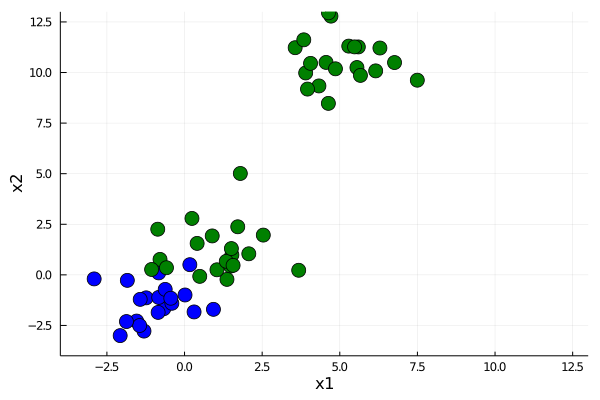

In [1]:
# データを作る
N = 60

y_class1 = ones(Float64, Int(N/3))
x_class1 = randn(Float64, Int(N/3), 2) .- 1.0
color_class1 = fill(:blue, Int(N/3))

y_class2 = - ones(Float64, Int(N/3))
x_class2 = randn(Float64, Int(N/3), 2) .+ 1.0
color_class2 = fill(:green, Int(N/3))

y_class2_outlier = - ones(Float64, Int(N/3))
x_class2_outlier = randn(Float64, Int(N/3), 2) .+ [5.0 10.0]
color_class2_outlier = fill(:green, Int(N/3))

y = [y_class1; y_class2; y_class2_outlier]
x = [x_class1; x_class2; x_class2_outlier]
c = [color_class1; color_class2; color_class2_outlier]

scatter(x[:, 1], x[:, 2], xlims=(-4,13), ylims=(-4,13), xlabel="x1", ylabel="x2", markersize=8, markercolor=c, legend=false)

In [1]:
model = svmtrain(x', y, kernel=Kernel.Linear)

SVM{Float64,KERNEL}(SVC, Linear, nothing, 2, 60, 2, [1.0, -1.0], Int32[1, 2], Float64[], Int32[], SupportVectors{Array{Float64,1},Array{Float64,2}}(9, Int32[4, 5], [1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0], [-0.831921 0.0158944 … -1.06024 -0.58164; 0.0972145 -0.994497 … 0.266334 0.352582], Int32[3, 11, 16, 17, 21, 26, 30, 36, 40], LIBSVM.SVMNode[SVMNode(1, -0.831921), SVMNode(1, 0.0158944), SVMNode(1, 0.17097), SVMNode(1, -0.622854), SVMNode(1, -0.7891), SVMNode(1, 0.490169), SVMNode(1, 1.3665), SVMNode(1, -1.06024), SVMNode(1, -0.58164)]), 0.0, [1.0; 1.0; … ; -1.0; -1.0], Float64[], Float64[], [0.427591], 3, 0.5, 200.0, 0.001, 1.0, 0.5, 0.1, true, false)

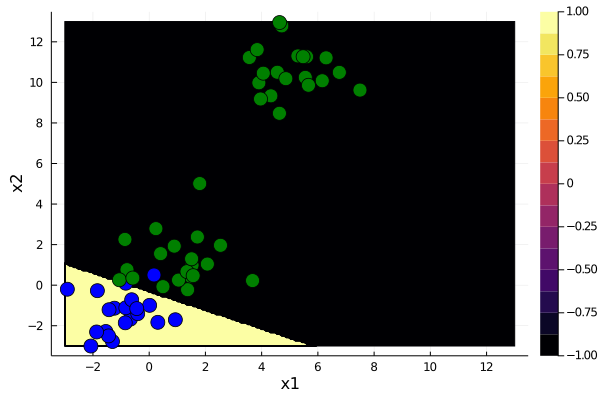

In [1]:
f(x1, x2) = svmpredict(model, reshape([x1, x2], 2, 1))[1][1]
x1 = range(-3.0, 13.0, length = 200)
x2 = range(-3.0, 13.0, length = 200)
contourf(x1, x2, f)

scatter!(x[:, 1], x[:, 2], xlabel="x1", ylabel="x2", markersize=8, markercolor=c, legend=false)

# フィッシャーのあやめ

今回は最初からフィッシャーのあやめを題材に使います。

![iris.png](https://nextjournal.com/data/QmcsTUT7gawLt7FGkvJhLYSug8S6Zi8t4DcfkchqF3dzR9?content-type=image/png&node-id=70632cc1-2ffa-4bc7-96da-e8c55f31bc23&filename=iris.png&node-kind=file)

アヤメの個体150サンプルについて、以下の4つの特徴量を計測して、その種(3種, setosa, versicolor, virginica)がラベル付けされています。特徴量と種の関係をデータから学習できるか？という問題に用いられます。例えば、ラベルを使って教師あり学習を行って種を分ける境界を探る問題や、敢えてラベルを用いずにクラスタリングを行ってその性能を検証する問題です。そうした機械学習の手法を評価検証する用途で用いられることが多いです。

1. SepalLength ガクの長さ (cm単位、説明変数)
2. SepalWidth ガクの太さ (cm単位、説明変数)
3. PetalLength 花弁の長さ (cm単位、説明変数)
4. PetalWidth 花弁の太さ (cm単位、説明変数)
5. Species 種類 (setosa, versicolor, virginica、ラベル・目的変数)

[iris.csv](https://nextjournal.com/data/QmP6fvLv5D5ozPEcbK1vxmbBua2cVZGs7paMudgjhJox5U?content-type=text/csv&node-id=3f487d71-5f96-4da0-b327-2eb0970f20d5&filename=iris.csv&node-kind=file)


In [1]:
# CSVデータの読み込み
iris = CSV.read("/.nextjournal/data-named/QmP6fvLv5D5ozPEcbK1vxmbBua2cVZGs7paMudgjhJox5U/iris.csv")

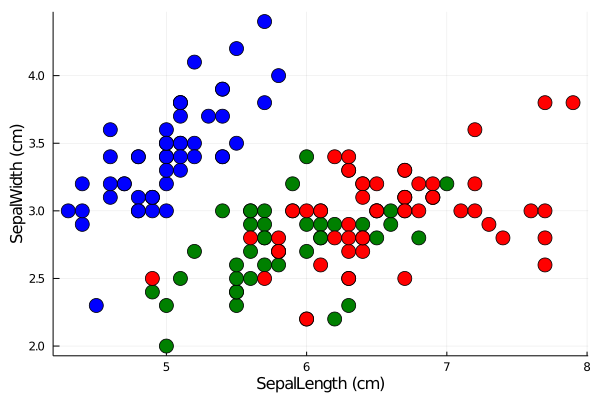

In [1]:
N = size(iris, 1)

y = zeros(Int64, N)
c = fill(:blue, N)
for n = 1:N
  if iris.Species[n] == "setosa"
    y[n] = 0
    c[n] = :blue
  elseif iris.Species[n] == "versicolor"
    y[n] = 1
    c[n] = :green
  else #verginica
    y[n] = 2
    c[n] = :red
  end
end

x = Array(iris[:, 2:5])

scatter(x[:, 1], x[:, 2], xlabel="SepalLength (cm)", ylabel="SepalWidth (cm)", markersize=8, markercolor=c, legend=:false)

訓練用データとテスト用データに分けておきます

In [1]:
y_train = y[1:2:end]
x_train = x[1:2:end, :]
y_test  = y[2:2:end]
x_test  = x[2:2:end, :]

75×4 Array{Float64,2}:
 4.9  3.0  1.4  0.2
 4.6  3.1  1.5  0.2
 5.4  3.9  1.7  0.4
 5.0  3.4  1.5  0.2
 4.9  3.1  1.5  0.1
 4.8  3.4  1.6  0.2
 4.3  3.0  1.1  0.1
 5.7  4.4  1.5  0.4
 5.1  3.5  1.4  0.3
 5.1  3.8  1.5  0.3
 ⋮              
 6.3  2.8  5.1  1.5
 7.7  3.0  6.1  2.3
 6.4  3.1  5.5  1.8
 6.9  3.1  5.4  2.1
 6.9  3.1  5.1  2.3
 6.8  3.2  5.9  2.3
 6.7  3.0  5.2  2.3
 6.5  3.0  5.2  2.0
 5.9  3.0  5.1  1.8

# サポートベクトルマシン: 線形

In [1]:
model = svmtrain(x_train[:, [1, 2]]', y_train, kernel=Kernel.Linear)

SVM{Int64,KERNEL}(SVC, Linear, nothing, 2, 75, 3, [0, 1, 2], Int32[1, 2, 3], Float64[], Int32[], SupportVectors{Array{Int64,1},Array{Float64,2}}(48, Int32[8, 21, 19], [0, 0, 0, 0, 0, 0, 0, 0, 1, 1  …  2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [4.8 5.8 … 6.3 6.2; 3.0 4.0 … 2.5 3.4], Int32[7, 8, 10, 11, 15, 16, 18, 19, 26, 27  …  65, 67, 68, 69, 70, 71, 72, 73, 74, 75], LIBSVM.SVMNode[SVMNode(1, 4.8), SVMNode(1, 5.8), SVMNode(1, 5.7), SVMNode(1, 5.4), SVMNode(1, 5.2), SVMNode(1, 4.8), SVMNode(1, 4.9), SVMNode(1, 5.5), SVMNode(1, 7.0), SVMNode(1, 6.9)  …  SVMNode(1, 6.4), SVMNode(1, 6.4), SVMNode(1, 6.1), SVMNode(1, 6.3), SVMNode(1, 6.0), SVMNode(1, 6.7), SVMNode(1, 5.8), SVMNode(1, 6.7), SVMNode(1, 6.3), SVMNode(1, 6.2)]), 0.0, [1.0 0.624001; 0.0 0.234408; … ; -0.0 -1.0; -1.0 -1.0], Float64[], Float64[], [-2.51925, -3.99995, -11.0317], 3, 0.5, 200.0, 0.001, 1.0, 0.5, 0.1, true, false)

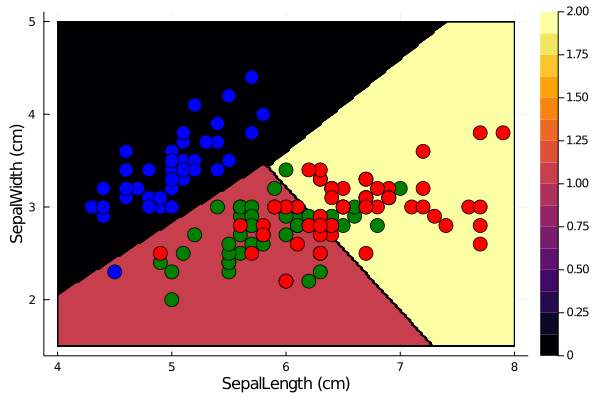

In [1]:
f(x1, x2) = svmpredict(model, reshape([x1, x2], 2, 1))[1][1]
x1 = range(4.0, 8.0, length = 200)
x2 = range(1.5, 5.0, length = 200)
contourf(x1, x2, f)

scatter!(x[:, 1], x[:, 2], xlabel="SepalLength (cm)", ylabel="SepalWidth (cm)", markersize=8, markercolor=c, legend=false)

テスト用データを使って汎化性能を測ります

In [1]:
(predicted_labels, decision_values) = svmpredict(model, x_test[:, [1, 2]]');
println("Accuracy is ", mean((predicted_labels .== y_test))*100)

# サポートベクトルマシン: カーネルトリック

カーネル関数としてRBFカーネルを使って決定境界を曲げてみましょう

$$
K(\bf{x},\bf{x}') = \exp \left(-\gamma \| \bf{x} - \bf{x}' \| \right)
$$


In [1]:
model = svmtrain(x[:, [1, 2]]', y, kernel=Kernel.RadialBasis, gamma=0.7, cost=1.0)

SVM{Int64,KERNEL}(SVC, RadialBasis, nothing, 2, 150, 3, [0, 1, 2], Int32[1, 2, 3], Float64[], Int32[], SupportVectors{Array{Int64,1},Array{Float64,2}}(86, Int32[11, 41, 34], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [4.9 4.4 … 6.2 5.9; 3.0 2.9 … 3.4 3.0], Int32[2, 9, 13, 15, 19, 21, 26, 32, 37, 42  …  137, 138, 139, 141, 143, 146, 147, 148, 149, 150], LIBSVM.SVMNode[SVMNode(1, 4.9), SVMNode(1, 4.4), SVMNode(1, 4.8), SVMNode(1, 5.8), SVMNode(1, 5.7), SVMNode(1, 5.4), SVMNode(1, 5.0), SVMNode(1, 5.4), SVMNode(1, 5.5), SVMNode(1, 4.5)  …  SVMNode(1, 6.3), SVMNode(1, 6.4), SVMNode(1, 6.0), SVMNode(1, 6.7), SVMNode(1, 5.8), SVMNode(1, 6.7), SVMNode(1, 6.3), SVMNode(1, 6.5), SVMNode(1, 6.2), SVMNode(1, 5.9)]), 0.0, [1.0 0.0; 0.0 0.0934467; … ; -1.0 -1.0; -1.0 -1.0], Float64[], Float64[], [-0.0196651, 0.173677, 0.15917], 3, 0.7, 200.0, 0.001, 1.0, 0.5, 0.1, true, false)

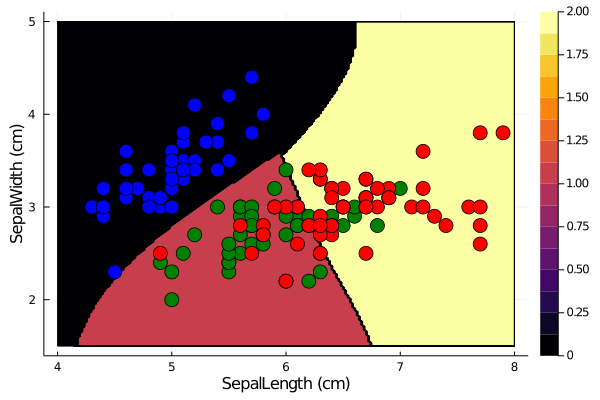

In [1]:
f(x1, x2) = svmpredict(model, reshape([x1, x2], 2, 1))[1][1]
x1 = range(4.0, 8.0, length = 200)
x2 = range(1.5, 5.0, length = 200)
contourf(x1, x2, f)

scatter!(x[:, 1], x[:, 2], xlabel="SepalLength (cm)", ylabel="SepalWidth (cm)", markersize=8, markercolor=c, legend=false)

テスト用データを使って汎化性能を測ります

In [1]:
(predicted_labels, decision_values) = svmpredict(model, x_test[:, [1, 2]]');
println("Accuracy is ", mean((predicted_labels .== y_test))*100)

# やってみよう：カーネルのハイパーパラメータの影響

RBFカーネルのハイパーパラメータγを変更すると結果がどう変化するか見てみましょう。なぜそうなるのか考察してみてください。具体的には、svmtran()関数の引数gammaの値を変更してみましょう

また、カーネル関数を変えたらどうなるか見てみましょう。kernelという引数に与えられるのはKernel.RadialBasisの他に、 

Kernel.Linear 

Kernel.polynomial

Kernel.Sigmoid 

などがあります。

In [1]:
#model = svmtrain(x[:, [1, 2]]', y, kernel=Kernel.RadialBasis, gamma=10.0, cost=1.0)

In [1]:
#contourf(x1, x2, f)
#scatter!(x[:, 1], x[:, 2], xlabel="SepalLength (cm)", ylabel="SepalWidth (cm)", markersize=8, markercolor=c, legend=false)

In [1]:
#(predicted_labels, decision_values) = svmpredict(model, x_test[:, [1, 2]]');
#println("Accuracy is ", mean((predicted_labels .== y_test))*100)